# Analysis

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Loading Dataset
meta_data = pd.read_csv("HAM10000_metadata.csv")

# Getting Labels
# all_labels = meta_data['dx']
labels = meta_data['dx'].isin(['bcc', 'mel', 'akiec'])
meta_attributes = meta_data[["dx", "dx_type", "age", "sex", "localization"]]

# missing value remove
imputer = SimpleImputer(strategy='most_frequent')
for col in meta_attributes.columns:
    # print(f"{col=}")
    meta_attributes[col] = imputer.fit_transform(meta_attributes[[col]]).ravel()

# categorical_columns = meta_attributes.select_dtypes(include=['object']).columns
# print(f"{categorical_columns=}")
# # label_encoders = {}
# for col in categorical_columns:
#     le = LabelEncoder()
#     meta_attributes[col] = le.fit_transform(meta_attributes.loc[:,col])
#     # label_encoders[col] = le

# print(f"{meta_attributes=}")
# image_name = meta_data['image_id']

# df_without_label = df.drop(columns=['label'])
# print(f"{df_without_label=}")
# df_with_meta = pd.concat([df_without_label, meta_attributes], axis=1)
# print(f"{df_with_meta=}")
# pixel_columns = df_without_label.columns

# cancer_count = sum(labels == True)
# noncancer_count = sum(labels == False)
# print("Cancer Instances:", cancer_count)
# print("Non-Cancer Instances:", noncancer_count)
# df

C:\Users\DELL\AppData\Local\Temp\ipykernel_36628\295499632.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_attributes[col] = imputer.fit_transform(meta_attributes[[col]]).ravel()
C:\Users\DELL\AppData\Local\Temp\ipykernel_36628\295499632.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_attributes[col] = imputer.fit_transform(meta_attributes[[col]]).ravel()
C:\Users\DELL\AppData\Local\Temp\ipykernel_36628\295499632.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

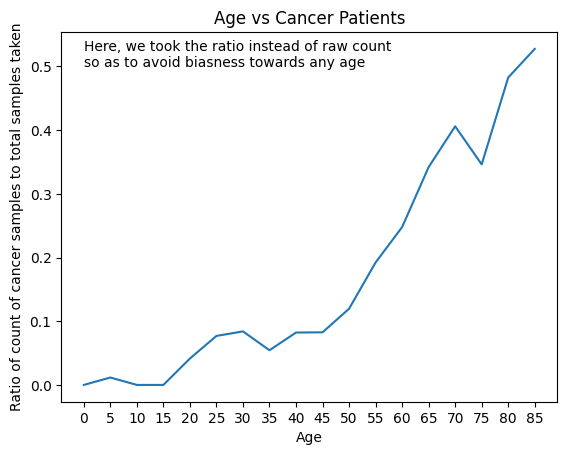

age
45.0    1356
50.0    1187
55.0    1009
40.0     985
60.0     803
70.0     756
35.0     753
65.0     731
75.0     618
30.0     464
80.0     404
85.0     290
25.0     247
20.0     169
5.0       86
15.0      77
10.0      41
0.0       39
Name: count, dtype: int64

In [75]:
ages = meta_attributes['age']
n = len(meta_attributes)
samples_taken = ages.value_counts()
x = samples_taken.keys().sort_values()
y = []

for age in x:
    indices = meta_attributes['age']==age
    y.append(sum(meta_attributes[indices]['dx'].isin(['bcc', 'mel', 'akiec']))/samples_taken[age])

plt.plot(x, y)
plt.text(0, 0.5, "Here, we took the ratio instead of raw count\nso as to avoid biasness towards any age")
plt.ylabel("Ratio of count of cancer samples to total samples taken")
plt.xlabel("Age")
plt.xticks(ticks=range(0, 90, 5))
plt.title("Age vs Cancer Patients")
plt.show()
samples_taken

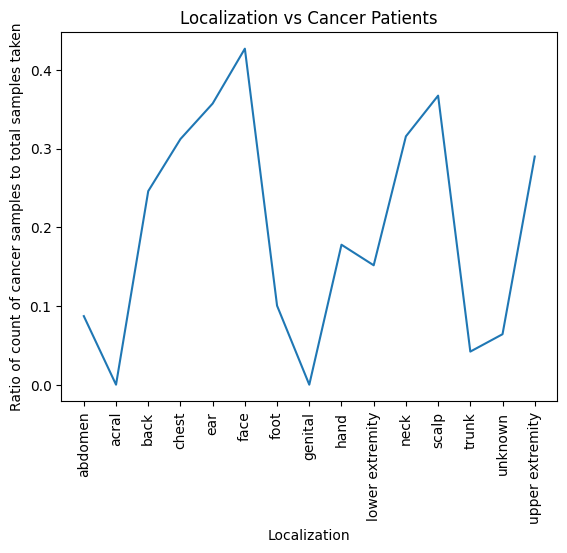

localization
back               2192
lower extremity    2077
trunk              1404
upper extremity    1118
abdomen            1022
face                745
chest               407
foot                319
unknown             234
neck                168
scalp               128
hand                 90
ear                  56
genital              48
acral                 7
Name: count, dtype: int64

In [76]:
localizations = meta_attributes['localization']
# n = len(meta_attributes)
samples_taken = localizations.value_counts()
x = samples_taken.keys().sort_values()
y = []

for localization in x:
    indices = meta_attributes['localization']==localization
    y.append(sum(meta_attributes[indices]['dx'].isin(['bcc', 'mel', 'akiec']))/samples_taken[localization])

plt.plot(x, y)
plt.ylabel("Ratio of count of cancer samples to total samples taken")
plt.xlabel("Localization")
plt.title("Localization vs Cancer Patients")
plt.xticks(rotation='vertical')
plt.show()
samples_taken

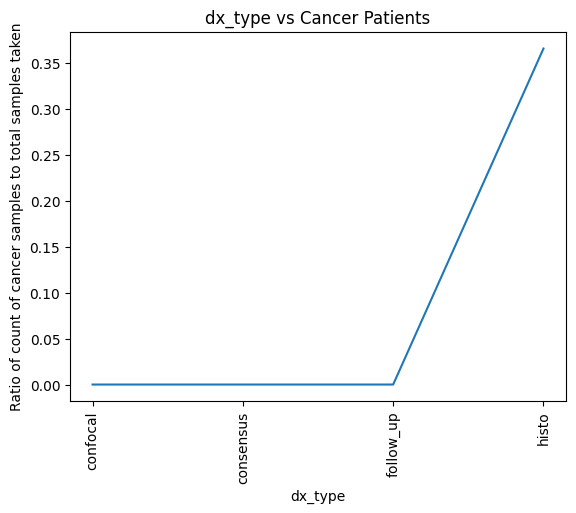

dx_type
histo        5340
follow_up    3704
consensus     902
confocal       69
Name: count, dtype: int64

In [59]:
dx_types = meta_attributes['dx_type']
# n = len(meta_attributes)
samples_taken = dx_types.value_counts()
x = samples_taken.keys().sort_values()
y = []

for dx_type in x:
    indices = meta_attributes['dx_type']==dx_type
    y.append(sum(meta_attributes[indices]['dx'].isin(['bcc', 'mel', 'akiec']))/samples_taken[dx_type])

plt.plot(x, y)
plt.ylabel("Ratio of count of cancer samples to total samples taken")
plt.xlabel("dx_type")
plt.text(0, 0.5, "Here, we took the ratio instead of raw count\nso as to avoid biasness towards any age")
plt.title("dx_type vs Cancer Patients")
plt.xticks(rotation='vertical')
plt.show()
samples_taken

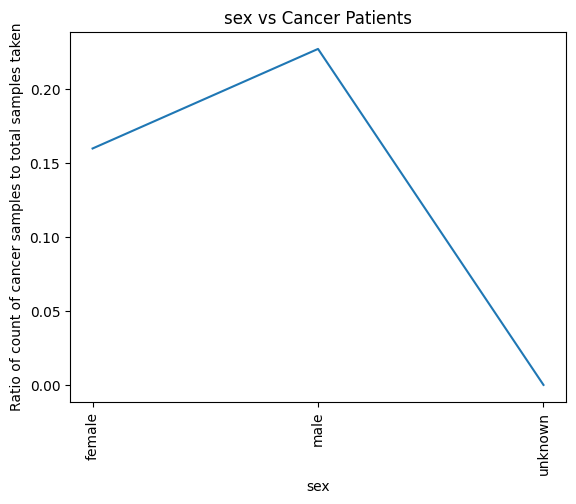

sex
male       5406
female     4552
unknown      57
Name: count, dtype: int64

In [62]:
sexs = meta_attributes['sex']
samples_taken = sexs.value_counts()
x = samples_taken.keys().sort_values()
y = []

for sex in x:
    indices = meta_attributes['sex']==sex
    y.append(sum(meta_attributes[indices]['dx'].isin(['bcc', 'mel', 'akiec']))/samples_taken[sex])

plt.plot(x, y)
plt.ylabel("Ratio of count of cancer samples to total samples taken")
plt.xlabel("sex")
plt.title("sex vs Cancer Patients")
plt.xticks(rotation='vertical')
plt.show()
samples_taken